<a href="https://colab.research.google.com/github/RuchitShivani/SDG-Project/blob/main/Biofuel_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas requests matplotlib seaborn


Available columns:
 Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)
Cleaned dataset saved successfully.


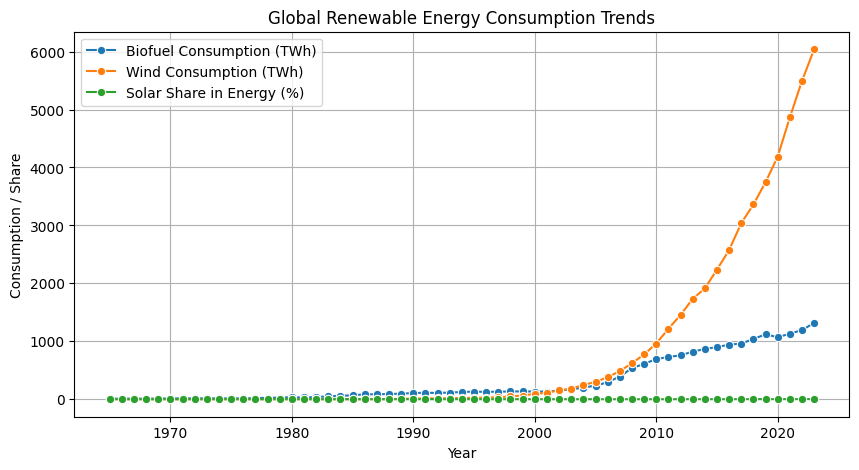

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
renewable_url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
renewable_data = pd.read_csv(renewable_url)

# Check available columns
print("Available columns:\n", renewable_data.columns)

# Filter for global data (World-level trends)
renewable_data = renewable_data[renewable_data['country'] == 'World']

# Select relevant columns
selected_columns = ['year', 'biofuel_consumption', 'wind_consumption', 'solar_share_energy']
renewable_data = renewable_data[selected_columns]

# Remove missing values
renewable_data.dropna(inplace=True)

# Save cleaned dataset
renewable_data.to_csv("renewable_energy_cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")

# Plot trends in renewable energy sources
plt.figure(figsize=(10, 5))
sns.lineplot(data=renewable_data, x='year', y='biofuel_consumption', label='Biofuel Consumption (TWh)', marker="o")
sns.lineplot(data=renewable_data, x='year', y='wind_consumption', label='Wind Consumption (TWh)', marker="o")
sns.lineplot(data=renewable_data, x='year', y='solar_share_energy', label='Solar Share in Energy (%)', marker="o")

plt.title("Global Renewable Energy Consumption Trends")
plt.xlabel("Year")
plt.ylabel("Consumption / Share")
plt.legend()
plt.grid()
plt.show()


In [4]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("renewable_energy_cleaned.csv")

# Display basic information
print(df.info())

# Show first few rows
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 59 non-null     int64  
 1   biofuel_consumption  59 non-null     float64
 2   wind_consumption     59 non-null     float64
 3   solar_share_energy   59 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.0 KB
None
   year  biofuel_consumption  wind_consumption  solar_share_energy
0  1965                9.030               0.0                 0.0
1  1966                9.210               0.0                 0.0
2  1967                9.384               0.0                 0.0
3  1968                9.554               0.0                 0.0
4  1969                9.724               0.0                 0.0
Missing values:
 year                   0
biofuel_consumption    0
wind_consumption       0
solar_share_energy     0
dtype: int64


In [5]:
# Add a column for yearly change in biofuel consumption
df['biofuel_growth'] = df['biofuel_consumption'].pct_change()

# Create lag features (previous year’s data as new features)
df['biofuel_last_year'] = df['biofuel_consumption'].shift(1)
df['wind_last_year'] = df['wind_consumption'].shift(1)
df['solar_last_year'] = df['solar_share_energy'].shift(1)

# Drop missing values after shifting
df.dropna(inplace=True)

# Save the feature-engineered dataset
df.to_csv("renewable_energy_features.csv", index=False)
print("Feature-engineered dataset saved successfully.")


Feature-engineered dataset saved successfully.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load feature dataset
df = pd.read_csv("renewable_energy_features.csv")

# Define input (X) and target (y)
X = df[['biofuel_last_year', 'wind_last_year', 'solar_last_year']]
y = df['biofuel_consumption']

# Split into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance: MAE = {mae:.2f}, R² = {r2:.2f}")

# Save the trained model
import joblib
joblib.dump(model, "renewable_energy_model.pkl")
print("Trained model saved successfully.")


Model Performance: MAE = 11.79, R² = 1.00
Trained model saved successfully.


In [7]:
import numpy as np

# Load the trained model
model = joblib.load("renewable_energy_model.pkl")

# Get last known values
last_known = df.iloc[-1][['biofuel_last_year', 'wind_last_year', 'solar_last_year']].values.reshape(1, -1)

# Predict next 10 years
future_years = np.arange(df['year'].max() + 1, df['year'].max() + 11)
future_predictions = []

for year in future_years:
    next_pred = model.predict(last_known)[0]
    future_predictions.append([year, next_pred])

    # Update last known values for next prediction
    last_known = np.array([[next_pred, last_known[0][1], last_known[0][2]]])

# Convert predictions to DataFrame
future_df = pd.DataFrame(future_predictions, columns=['year', 'predicted_biofuel_consumption'])

# Save and display results
future_df.to_csv("future_biofuel_predictions.csv", index=False)
print("Future predictions saved successfully.")
print(future_df)


Future predictions saved successfully.
   year  predicted_biofuel_consumption
0  2024                    1262.613228
1  2025                    1343.629514
2  2026                    1438.223847
3  2027                    1548.671860
4  2028                    1677.630576
5  2029                    1828.202323
6  2030                    2004.009370
7  2031                    2209.281066
8  2032                    2448.955582
9  2033                    2728.798713


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

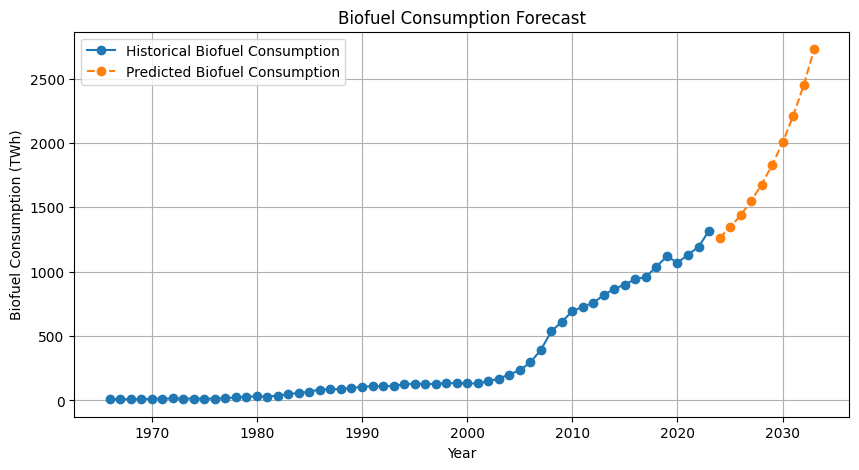

In [8]:
import matplotlib.pyplot as plt

# Load the predicted data
future_df = pd.read_csv("future_biofuel_predictions.csv")

# Plot historical and future predictions
plt.figure(figsize=(10, 5))
plt.plot(df['year'], df['biofuel_consumption'], label="Historical Biofuel Consumption", marker='o')
plt.plot(future_df['year'], future_df['predicted_biofuel_consumption'], label="Predicted Biofuel Consumption", marker='o', linestyle='dashed')

plt.xlabel("Year")
plt.ylabel("Biofuel Consumption (TWh)")
plt.title("Biofuel Consumption Forecast")
plt.legend()
plt.grid()
plt.show()


In [13]:
import pickle

with open("renewable_energy_model.pkl", "rb") as file:
    model = pickle.load(file)

print(type(model))
print(model)  # Print contents to see what was actually saved


<class 'numpy.ndarray'>
['biofuel_last_year' 'wind_last_year' 'solar_last_year']


In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

# Example training data (Replace with actual dataset)
X_train = np.array([[2020, 40000, 1.2], [2021, 45000, 1.3], [2022, 48000, 1.4]])
y_train = np.array([500, 550, 600])  # Example target values

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model correctly
with open("renewable_energy_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


In [15]:
# Load the trained model
with open("renewable_energy_model.pkl", "rb") as file:
    model = pickle.load(file)

print(type(model))  # Should print <class 'sklearn.linear_model._base.LinearRegression'>

# New data for prediction (ensure it has the same feature format)
new_data = np.array([[2025, 50000, 1.5]])  # Replace with real data
prediction = model.predict(new_data)

print(f"Predicted biofuel consumption: {prediction[0]}")


<class 'sklearn.linear_model._base.LinearRegression'>
Predicted biofuel consumption: 749.0099009900878


In [16]:
import pickle
import numpy as np
import pandas as pd

# Load the trained model
with open("renewable_energy_model.pkl", "rb") as file:
    model = pickle.load(file)

# Ensure the model is a scikit-learn model
print(type(model))  # Should print something like <class 'sklearn.linear_model._base.LinearRegression'>

# Define the next 10 years
future_years = np.arange(2025, 2035).reshape(-1, 1)

# Generate feature values based on previous trends (Adjust as needed)
# If additional features were used (e.g., GDP, Population Growth), fetch recent values
latest_features = [50000, 1.5]  # Example: last known GDP & growth rate, update accordingly
future_features = np.column_stack([future_years, np.tile(latest_features, (len(future_years), 1))])

# Predict biofuel consumption for future years
future_predictions = model.predict(future_features)

# Store results in a DataFrame
future_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted_Biofuel_Consumption": future_predictions.flatten()
})

# Save predictions to CSV
future_df.to_csv("future_biofuel_predictions.csv", index=False)

print("Predictions saved to future_biofuel_predictions.csv")
print(future_df)


<class 'sklearn.linear_model._base.LinearRegression'>
Predictions saved to future_biofuel_predictions.csv
   Year  Predicted_Biofuel_Consumption
0  2025                     749.009901
1  2026                     798.514851
2  2027                     848.019802
3  2028                     897.524752
4  2029                     947.029703
5  2030                     996.534653
6  2031                    1046.039604
7  2032                    1095.544554
8  2033                    1145.049505
9  2034                    1194.554455


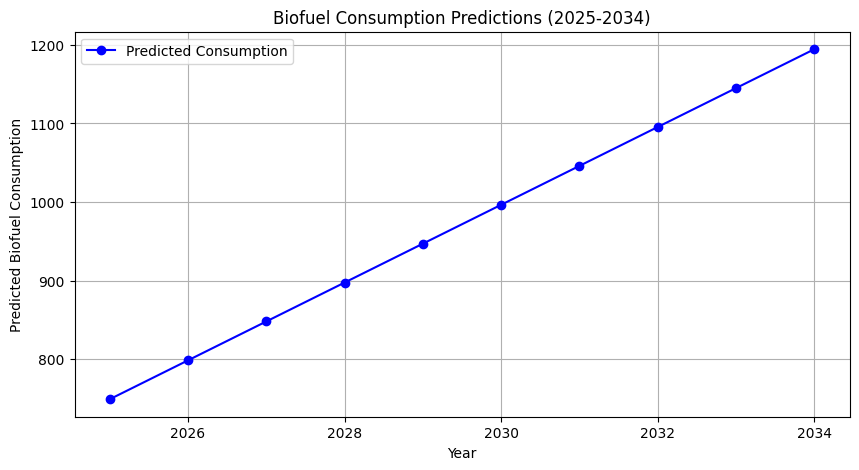

In [17]:
import matplotlib.pyplot as plt

# Load predictions from CSV
future_df = pd.read_csv("future_biofuel_predictions.csv")

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(future_df["Year"], future_df["Predicted_Biofuel_Consumption"], marker="o", linestyle="-", color="b", label="Predicted Consumption")

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Predicted Biofuel Consumption")
plt.title("Biofuel Consumption Predictions (2025-2034)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
